In [130]:
#python 3.x
import numpy as  np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import libvictor as lv

In [4]:
data_dir= '../../../data/aec/'

In [5]:
spells = pd.read_csv(os.path.join(data_dir, 'spell_clean.csv'))
# merged = pd.read_csv(os.path.join(data_dir, 'CYF Merged.csv'))

## Note on spells

If child runs away for longer than a week, their spell will be considered ended, and a new spell would start if they return.

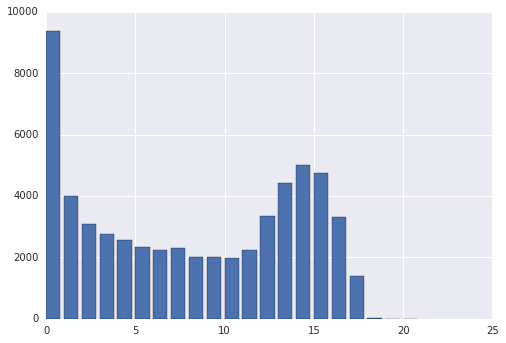

In [6]:
# age of child at start of spell
ages = spells.STARTAGE.value_counts()
_ = plt.bar(ages.index, ages)

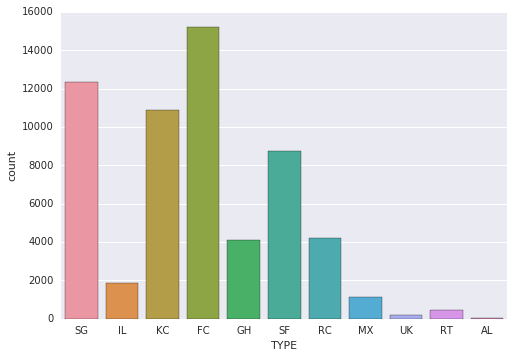

In [26]:
# primary placement type of spell
_ = sns.countplot(spells.TYPE)

- AL - Alternative Placement (equiv to PAL)
- FC - Foster Care (equiv to PFC)
- GH  Group Home (equiv to PGH)
- IL Independent Living (equiv to PIL)
- KC Relative/Kinship Care (including fictive kin) – licensed & unlicensed (equiv to PKC)
- RC Residential Care (excluding RTF) (equiv to PRC)
- RT Residential Treatment Facilities (equiv to PRT)
- SF Shelter Foster Care (equiv to PSF)
- SG Shelter Group Home (equiv to PSG)
- SK Shelter Kinship Care (equiv to PSK)
- UK Unknown (equiv to PUK)
- MX - Mixed type (When >50% is not equal to particular type)

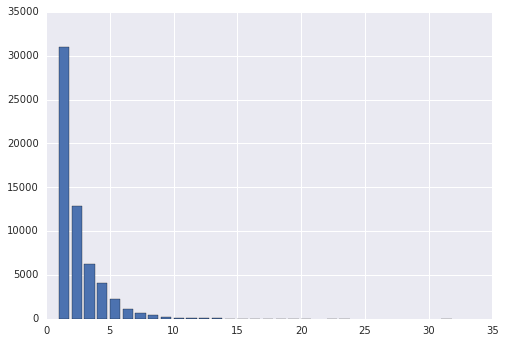

In [28]:
# number of placements per spell
nplacements = spells.NPLACES.value_counts()
_ = plt.bar(nplacements.index, nplacements)

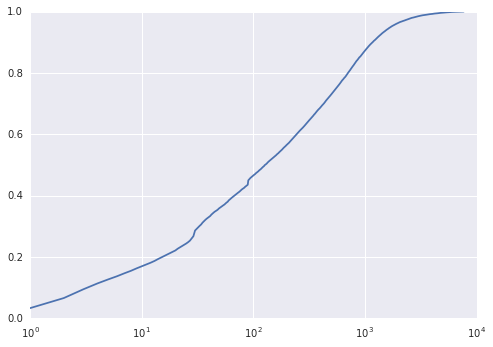

In [100]:
# CDF of spell durations in days
spell_len = lv.get_cdf(spells.DURAT)
_ = plt.semilogx(spell_len.index, spell_len)

In [ ]:
# spell durations vs number of placements
_ = sns.jointplot(spells.DURAT, spells.NPLACES, marker='.', alpha = 0.3)

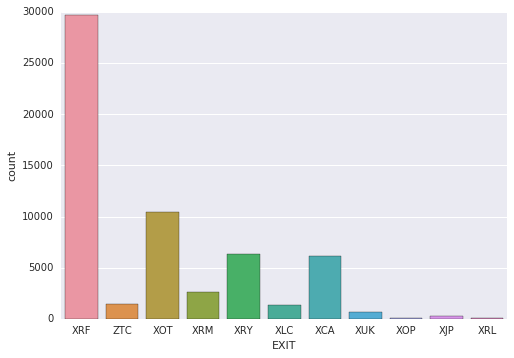

In [35]:
# spell exit types
_ = sns.countplot(spells.EXIT)

## EXIT codes in spell_clean.csv

### Good:
- XRF: reunified with family
- XLC: legal custodianship
- XRL: to relative (obsolete code)
- XCA: adopted

### Bad:
- XOT: other
- XOP: other (obsolete code)
- XRM: age out
- XRY: runaway
- XJP: juvenile probation

### Unknown:
- ZTC: spell ongoing
- XUK: unknown

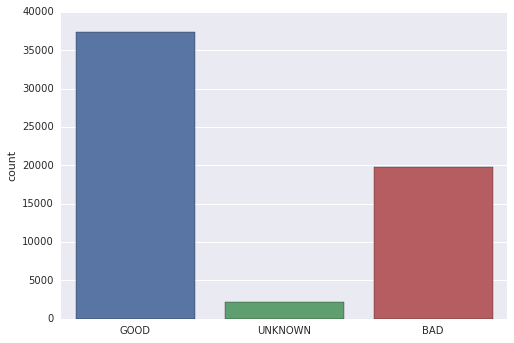

In [8]:
#map EXITS to outcome: GOOD, BAD, or UNKNOWN
good_val = 'GOOD'
bad_val = 'BAD'
unknown_val = 'UNKNOWN'
exit_mapping = {
    'XRF':good_val, 'XLC':good_val, 'XRL':good_val, 'XCA':good_val,
    'XOT':bad_val, 'XOP':bad_val, 'XRM':bad_val, 'XRY':bad_val, 'XJP':bad_val,
    'ZTC':unknown_val, 'XUK':unknown_val
}
outcomes = [exit_mapping[x] for x in spells.EXIT if x in exit_mapping]
sns.countplot(outcomes)
spells['outcome'] = outcomes

# distributions by outcome

In [191]:
def pmf_by_outcome(col, data=spells, figsize=(12,5), color = sns.color_palette('muted')):
    fig, ax = plt.subplots(1,1, figsize=figsize)
    n_total = len(data[col])
#     color = ['#77298A', '#94B02A', '#B95B13']
    for i,x in enumerate(['UNKNOWN', 'GOOD', 'BAD']):
        series = data[data.outcome==x][col]
        pct_string = ' ({0:.1f}%)'.format(100*len(series)/n_total)
        pmf = lv.get_pmf(series)
        is_categorical = pmf.index.dtype=='O'
        xs = np.arange(len(pmf.index))+i/3 if is_categorical else pmf.index+i/3
        ax.bar(xs, pmf, 1/3, facecolor=color[i], label=x+pct_string)
    if is_categorical:
        ax.set_xticks(range(len(pmf)))
    else:
        ax.set_xticks(pmf.index)
    ax.set_xticklabels(pmf.index, ha='left')
    ax.legend()
def cdf_by_outcome(col, data=spells, figsize=(12,5), scale='lin', color = sns.color_palette('muted')
):
    fig, ax = plt.subplots(1,1, figsize=figsize)
    n_total = len(data[col])
    for i,x in enumerate([ 'UNKNOWN', 'GOOD', 'BAD']):
        series = data[data.outcome==x][col]
        pct_string = ' ({0:.1f}%)'.format(100*len(series)/n_total)
        cdf = lv.get_cdf(series)
        plot_fn = ax.plot if scale=='lin' else ax.semilogx
        plot_fn(cmf.index, cdf, color=color[i], label=x+pct_string)
    ax.legend()

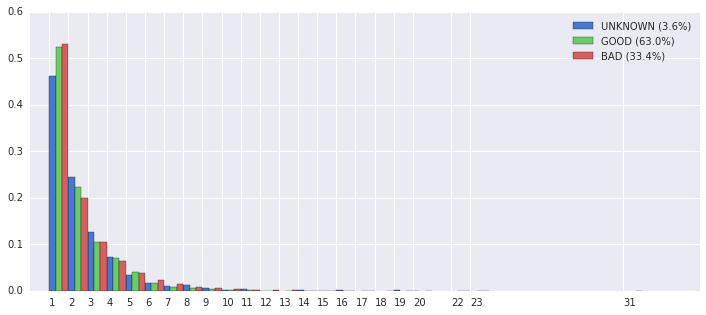

In [190]:
# PMF of number of placements in spell, separated by outcome
pmf_by_outcome('NPLACES')

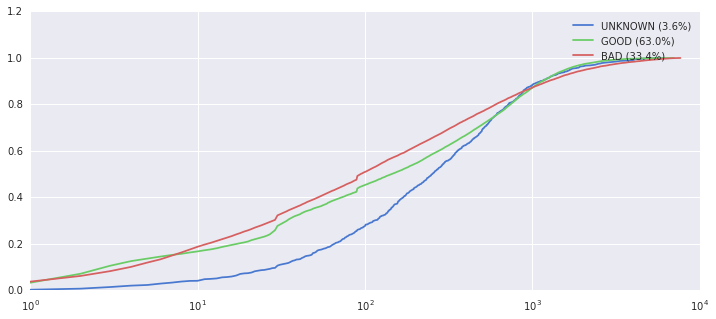

In [175]:
cdf_by_outcome('DURAT', scale='log')

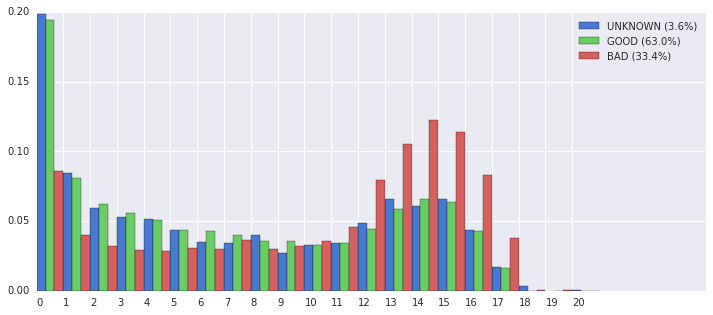

In [178]:
# PMF of age at first service, separated by outcome
pmf_by_outcome('STARTAGE')

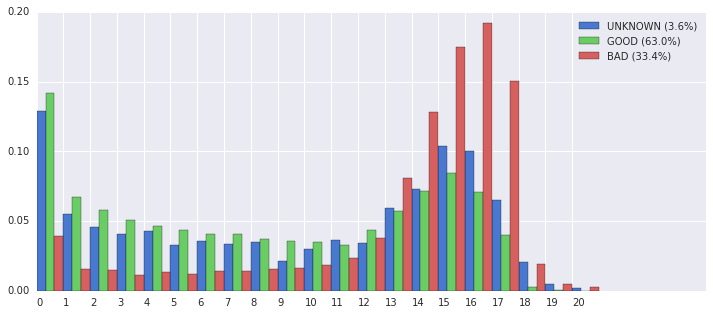

In [179]:
# PMF of age at beginning of spell by outcome
pmf_by_outcome('SPELLAGE')

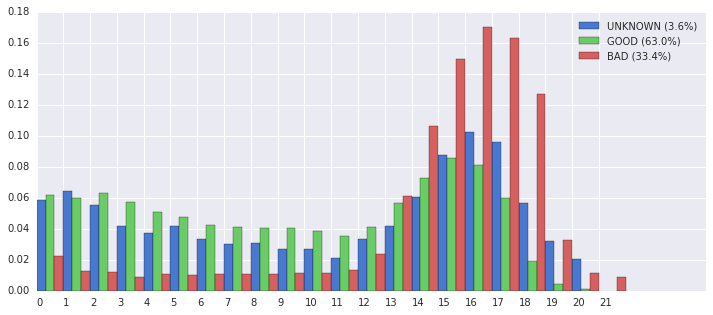

In [180]:
# PMF of age at end of spell by outcome
pmf_by_outcome('EXITAGE')

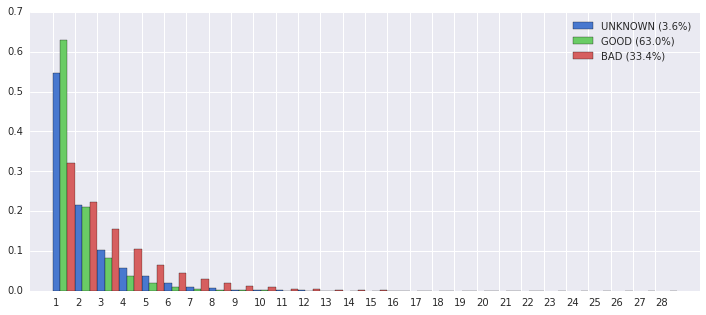

In [181]:
# PMFs of spell sequence number by outcome
pmf_by_outcome('SPELL')

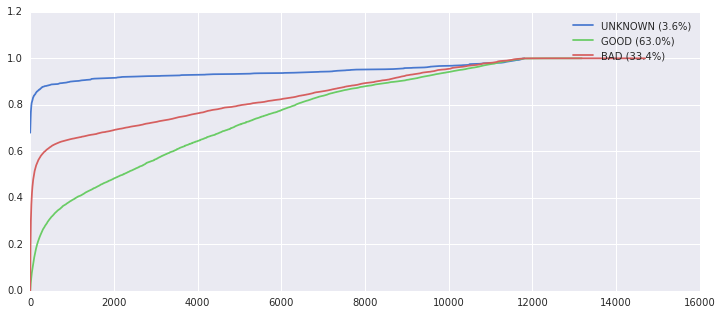

In [182]:
# CDFs of time between current and next spell by outcome
cdf_by_outcome('TIMER')

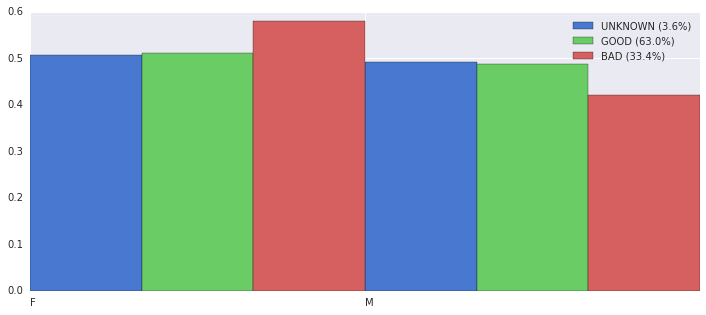

In [183]:
# PMFs of gender by outcome
pmf_by_outcome('GENDER')

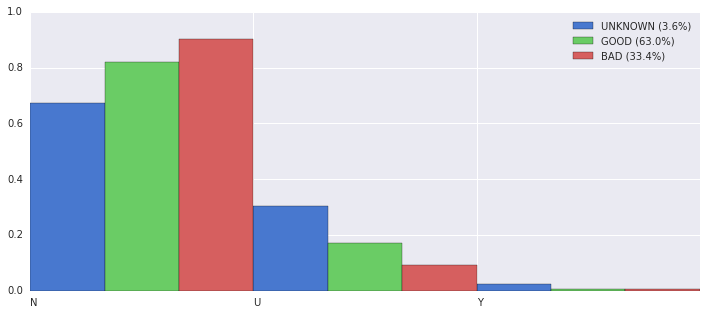

In [184]:
# PMFs of ethnicity by outcome
pmf_by_outcome('HISPANIC')

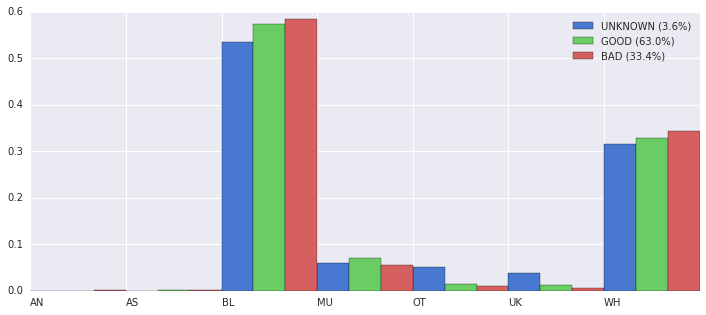

In [185]:
# PMFs of ethnicity by outcome
pmf_by_outcome('ETHNIC')

- AN - Native American
- AS - Asian and Pacific
- BL - Black/African American
- MU - Multiple
- OT - Other Category
- UK - Unknown
- WH - White

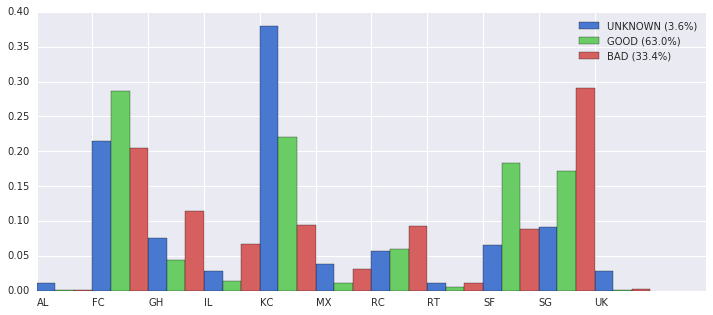

In [186]:
# PMFs of primary placement type by outcome
pmf_by_outcome('TYPE')

- AL - Alternative Placement (equiv to PAL)
- FC - Foster Care (equiv to PFC)
- GH  Group Home (equiv to PGH)
- IL Independent Living (equiv to PIL)
- KC Relative/Kinship Care (including fictive kin) – licensed & unlicensed (equiv to PKC)
- MX - Mixed type (When >50% is not equal to particular type)
- RC Residential Care (excluding RTF) (equiv to PRC)
- RT Residential Treatment Facilities (equiv to PRT)
- SF Shelter Foster Care (equiv to PSF)
- SG Shelter Group Home (equiv to PSG)
- UK Unknown (equiv to PUK)
- SK Shelter Kinship Care (equiv to PSK)

## miscellaneous notes below this point

### spell_clean.csv
A spell is a period in care, away from home, which ends upon return to home. It may contain multiple placements. spell_clean.csv 
### providers_clean.csv, providers_dummy.csv
big messy string which is covnerted to binary variables in dummy
### rp_abscondence_clean.csv
### rp_placements_clean.csv
most important
### rp_removal_clean.csv

### CYF Merged.csv
all tables merged

## clusters of interest
- always unstable
- always stable
- stable -> unstable
- unstable -> stable

## prediction problem
- predict cluster membership from child features

## notes on data
- race = 'other': mostly black/white multiethnic

## idea:
scatter mean vs centroid of outcome valence (vs. number of placements?)